In [1]:
#This dataset is composed of flight details from 2015, it contains details on scheduled departure and arrival times, 
#as well as actual arrival and departure times, delay times for both arrival and departure, and a breakdown of times 
#for specific delay reasons.

#The data considers a delay significant enough to track if the arrival was delayed more than 15 minutes, 
#so this is the basis I use for considering a flight 'delayed.'

#The airlines.csv and airports.csv files are on github, the flights.csv can be downloaded here: https://www.kaggle.com/usdot/flight-delays

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_notebook, show
%matplotlib inline
output_notebook()


Loading BokehJS ...

In [3]:
#pull our data in
flights_clean=pd.read_csv('flights_clean.csv', encoding='utf-8', index_col=0, dtype={'ORIGIN_AIRPORT':str, 'DESTINATION_AIRPORT':str, 'SCHEDULED_DEPARTURE':int, 'DEPARTURE_TIME':str, 'WHEELS_OFF':str, 'WHEELS_ON':str, 'SCHEDULED_ARRIVAL':str, 'ARRIVAL_TIME':str, 'DIVERTED':bool, 'CANCELLED':bool})
flights_clean["YEAR_MONTH_DAY"] = pd.to_datetime(flights_clean["YEAR_MONTH_DAY"])
flights_clean.head()

/Users/claireramming/Applications/anaconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,YEAR_MONTH_DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-01-01,Thu,AS,98,N407AS,ANC,SEA,5,2354,-11.0,...,0408,-22.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,Thu,AA,2336,N3KUAA,LAX,PBI,10,0002,-8.0,...,0741,-9.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,Thu,US,840,N171US,SFO,CLT,20,0018,-2.0,...,0811,5.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01,Thu,AA,258,N3HYAA,LAX,MIA,20,0015,-5.0,...,0756,-9.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,Thu,AS,135,N527AS,SEA,ANC,25,0024,-1.0,...,0259,-21.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN


YEAR_MONTH_DAY
1     469968
2     429191
3     504312
4     485151
5     496993
6     503897
7     520718
8     510536
9     464946
10    486165
11    467972
12    479230
dtype: int64

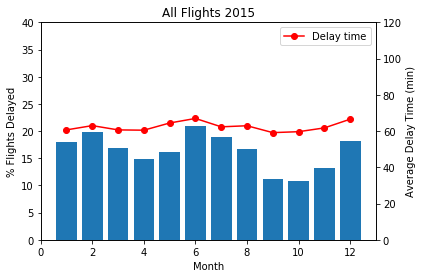

In [6]:
#Question 1: How often are flights delayed, and does time of year play a factor?

delay_all_ave = flights_clean[(flights_clean.DEPARTURE_DELAY > 0) & (flights_clean.ARRIVAL_DELAY >= 15)].ARRIVAL_DELAY.groupby(flights_clean.YEAR_MONTH_DAY.dt.month).mean() 
delay_all = flights_clean[(flights_clean.DEPARTURE_DELAY > 0) & (flights_clean.ARRIVAL_DELAY >= 15)].groupby(flights_clean.YEAR_MONTH_DAY.dt.month).size() / flights_clean.groupby(flights_clean.YEAR_MONTH_DAY.dt.month).size() * 100

x = delay_all.index
y1 = delay_all.values
y2 = delay_all_ave.values

fig, ax1=plt.subplots()
ax2=ax1.twinx()
def bldelay(ax1, ax2, x, y1, y2, ylim1, title):
    ax1.bar(x, y1)
    ax2.plot(x, y2, marker = 'o', color='r', label='Delay time')
    ax1.set_title(title)
    ax1.set_ylim(0,ylim1)
    ax2.set_ylim(0,120)
    ax1.set_xlabel('Month')
    ax2.legend(loc='upper right')

title = 'All Flights 2015'
ylim1=40
bldelay(ax1, ax2, x, y1, y2, ylim1, title)

ax1.set_ylabel('% Flights Delayed')
ax2.set_ylabel('Average Delay Time (min)')

flights_clean.groupby(flights_clean.YEAR_MONTH_DAY.dt.month).size()

In [ ]:
#What does the above tell us? There seems to be more delays in the summer and winter months, 
#with local peaks in February and June. The delay times also seem to trend up in Feb, June, and December. 
#This could mean weather is playing a factor in our delays. Our data contains a breakdown of 5 different causes for 
#flight delays. I also included a table of the number of flights per month to show that # of flights does not seem 
#to correlate with higher delay percentage or delay times.

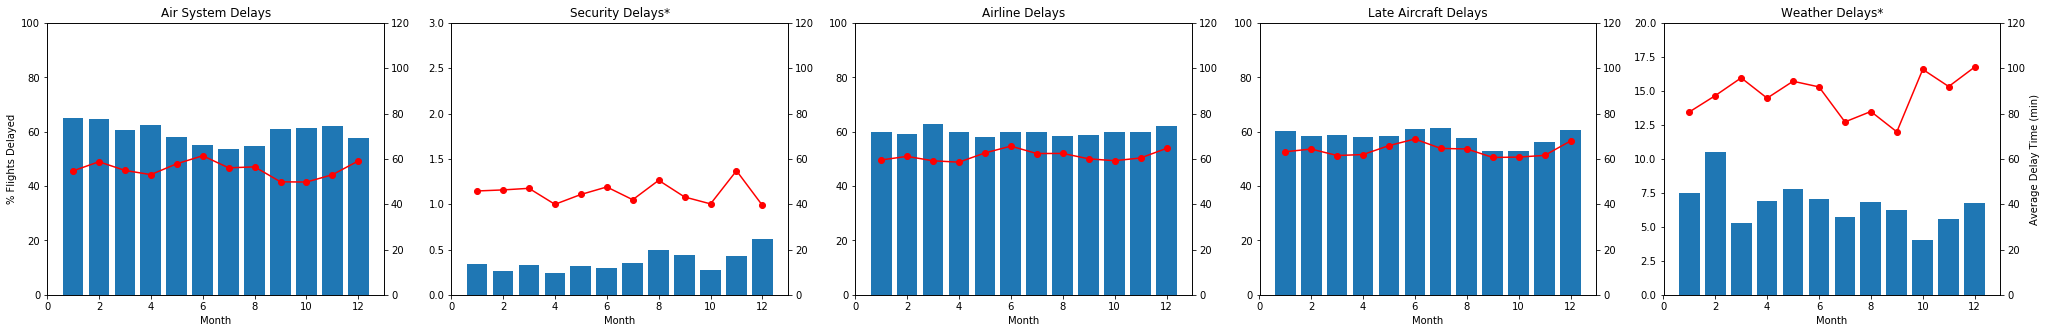

In [8]:
#Question 2: What is the breakdown in delay types? Are certain things responsible for more delays?
#note, there could be multiple delay types for one flight so adding each graph will lead to greater than 1.
#graphs with * in the title indicate the y axis limit is less than 100 for the % of delayed flights

plt.figure(figsize=((5*7),5))
x=[1,2,3,4,5,6,7,8,9,10,11,12]

#1
a1 = plt.subplot(151)

delayed_ave = flights_clean[flights_clean.AIR_SYSTEM_DELAY > 0].ARRIVAL_DELAY.groupby(flights_clean.YEAR_MONTH_DAY.dt.month).mean()
delayed = flights_clean[flights_clean.AIR_SYSTEM_DELAY > 0].groupby(flights_clean.YEAR_MONTH_DAY.dt.month).size() / flights_clean[(flights_clean.DEPARTURE_DELAY > 0) & (flights_clean.ARRIVAL_DELAY >= 15)].groupby(flights_clean.YEAR_MONTH_DAY.dt.month).size()*100


y1 = delayed.values
y2 = delayed_ave.values

ax1=a1.twinx()

bldelay(a1, ax1, x, y1, y2, 100, 'Air System Delays')

a1.set_ylabel('% Flights Delayed')

#2
a2 = plt.subplot(152)

delayed_ave = flights_clean[flights_clean.SECURITY_DELAY > 0].ARRIVAL_DELAY.groupby(flights_clean.YEAR_MONTH_DAY.dt.month).mean()
delayed = flights_clean[flights_clean.SECURITY_DELAY > 0].groupby(flights_clean.YEAR_MONTH_DAY.dt.month).size() / flights_clean[(flights_clean.DEPARTURE_DELAY > 0) & (flights_clean.ARRIVAL_DELAY >= 15)].groupby(flights_clean.YEAR_MONTH_DAY.dt.month).size()*100


y3 = delayed.values
y4 = delayed_ave.values

ax2=a2.twinx()

bldelay(a2, ax2, x, y3, y4, 3, 'Security Delays*')


#3
a3 = plt.subplot(153)

delayed_ave = flights_clean[flights_clean.AIRLINE_DELAY > 0].ARRIVAL_DELAY.groupby(flights_clean.YEAR_MONTH_DAY.dt.month).mean()
delayed = flights_clean[flights_clean.AIRLINE_DELAY > 0].groupby(flights_clean.YEAR_MONTH_DAY.dt.month).size() / flights_clean[(flights_clean.DEPARTURE_DELAY > 0) & (flights_clean.ARRIVAL_DELAY >= 15)].groupby(flights_clean.YEAR_MONTH_DAY.dt.month).size()*100


y5 = delayed.values
y6 = delayed_ave.values

ax3=a3.twinx()

bldelay(a3, ax3, x, y5, y6, 100, 'Airline Delays')

#4
a4 = plt.subplot(154)

delayed_ave = flights_clean[flights_clean.LATE_AIRCRAFT_DELAY > 0].ARRIVAL_DELAY.groupby(flights_clean.YEAR_MONTH_DAY.dt.month).mean()
delayed = flights_clean[flights_clean.LATE_AIRCRAFT_DELAY > 0].groupby(flights_clean.YEAR_MONTH_DAY.dt.month).size() / flights_clean[(flights_clean.DEPARTURE_DELAY > 0) & (flights_clean.ARRIVAL_DELAY >= 15)].groupby(flights_clean.YEAR_MONTH_DAY.dt.month).size()*100


y7 = delayed.values
y8 = delayed_ave.values

ax4=a4.twinx()

bldelay(a4, ax4, x, y7, y8, 100, 'Late Aircraft Delays')

#5
a5 = plt.subplot(155)
delayed_ave = flights_clean[flights_clean.WEATHER_DELAY > 0].ARRIVAL_DELAY.groupby(flights_clean.YEAR_MONTH_DAY.dt.month).mean()
delayed = flights_clean[flights_clean.WEATHER_DELAY > 0].groupby(flights_clean.YEAR_MONTH_DAY.dt.month).size() / flights_clean[(flights_clean.DEPARTURE_DELAY > 0) & (flights_clean.ARRIVAL_DELAY >= 15)].groupby(flights_clean.YEAR_MONTH_DAY.dt.month).size()*100


y9 = delayed.values
y10 = delayed_ave.values

ax5=a5.twinx()
bldelay(a5, ax5, x, y9, y10, 20, 'Weather Delays*')

ax5.set_ylabel('Average Delay Time (min)')

In [ ]:
#The above 5 graphs show that Air System delays, airline delays, and late aircraft delays are the 3 biggest sources 
#of delays. Weather plays a smaller role, but causes the biggest delay times. Security delays hardly play a factor 
#as they impact less than 1% of flights and on average do not delay flights for longer than an hour. 

#The buraeu of transportation statistics gives a nice breakdown of what each delay type actually involves 
#(https://www.rita.dot.gov/bts/help/aviation/html/understanding.html). The weather delay is actually only 
#counting extreme weather, and milder weather is counted in 'air system delays'. By the volume of late 
#aircraft delays, it is clear that once a plane is delayed for any reason, the time is not easily recoverable 
#and ends up affecting future flights. 

In [16]:
#Question 3: Are flights more likely to be delayed later in the day?
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool
from bokeh.models import NumeralTickFormatter

delay_pct = flights_clean[(flights_clean.DEPARTURE_DELAY > 0) & (flights_clean.ARRIVAL_DELAY >= 15)].ARRIVAL_DELAY.groupby(flights_clean.SCHEDULED_DEPARTURE).size() / flights_clean.ARRIVAL_DELAY.groupby(flights_clean.SCHEDULED_DEPARTURE).size()
source = ColumnDataSource( dict(
 x = delay_pct.index,
 y = delay_pct * 100,
 delay=flights_clean[(flights_clean.DEPARTURE_DELAY > 0) & (flights_clean.ARRIVAL_DELAY >= 15)].ARRIVAL_DELAY.groupby(flights_clean.SCHEDULED_DEPARTURE).median(),
 samplesize=flights_clean.ARRIVAL_DELAY.groupby(flights_clean.SCHEDULED_DEPARTURE).size()
))

hover = HoverTool(tooltips=[("Median Delay", "@delay"),("# Flights", "@samplesize")])
p = figure(width=1500, height=500, y_range=[0,105], x_range=[0,2400], tools=[hover], title='Percent Delayed by Scheduled Departure Time', 
           x_axis_label ='Scheduled Departure Time (military)', y_axis_label='% Delayed')
p.circle(x='x', y='y', size= 7, color='red', alpha=.5, source = source)
p.xaxis[0].formatter = NumeralTickFormatter(format="0000")
show(p)


/Users/claireramming/Applications/anaconda/lib/python3.6/site-packages/bokeh/models/sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))


In [ ]:
#We know from the previous graphs that once a flight is delayed, it affects others down the line. Another way to 
#view this is to look at the percent of delayed flights by departure time. Other than the spattering of flights 
#between midnight and 5am (there aren't as many flights at those times) there is a very strong curve showing a steady
#increase in flight delays until about 9pm, when we are getting back into red-eye territory. Hovering over specific points 
#in the graph will display the median delay time (over delayed flights for that departure time), and the amount of flights 
#in that departure time over the whole data set. 

In [17]:
#Question 4: Do we see delay times go up as it gets later in the day?

from bokeh.io import push_notebook
from ipywidgets import interact

months=['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
num = range(1,13)
dmonth=dict(zip(months,num))

data = flights_clean[(flights_clean.DEPARTURE_DELAY > 0) & (flights_clean.ARRIVAL_DELAY >= 15) & (flights_clean.YEAR_MONTH_DAY.dt.month == 1)]
source = ColumnDataSource( dict(
 x = data.SCHEDULED_DEPARTURE,
 y = data.ARRIVAL_DELAY,
))

def update(month):
    imonth=dmonth[month]
    data = flights_clean[(flights_clean.DEPARTURE_DELAY > 0) & (flights_clean.ARRIVAL_DELAY >= 15) & (flights_clean.YEAR_MONTH_DAY.dt.month == imonth)]
    new_data = dict(
     x = data.SCHEDULED_DEPARTURE,
     y = data.ARRIVAL_DELAY,
    )
    source.data = new_data
    p.title.text = month
    push_notebook()

p = figure(width=700, height=500, y_range=[0,300], tools='', title='Delay Times by Scheduled Departure Time', 
           x_axis_label ='Scheduled Departure Time (military)', y_axis_label='Delay (min)')
p.circle(x='x', y='y', size=7, color='black', alpha=0.02, source = source)
p.xaxis[0].formatter = NumeralTickFormatter(format="0000")
interact(update, month = months)
show(p, notebook_handle=True)
# add interaction for month since we're limiting our data here



In [ ]:
#The hover info in the previous graph showed the median delay times, but the above graph also shows a 
#trend in average delay as it gets later. This is actually a scatter plot, but because there are so many data points
#it creates a nice heat map of overlaying points. For January, it shows the bulk of the delays are under 100 minutes for 
#all times, but steadily climb from about 6am when most delays are under 50 minutes, to a peak about 6pm when a good 
#chunk of delays are starting to creep over 100 minutes. By 10pm the delays (and number of flights that are delayed) 
#drop significantly. There was too much data to display the trend for the whole year, so I made it by month, and you 
#can change the month of focus by selecting one from teh dropdown above the graph. 